# Analysis of Health Study

**Purpose:** This notebook performs a statistical analysis of health data. The goal is to explore the relationships between lifestyle factors (age, weight, smoking status) and health metrics (blood pressure, cholesterol).

**Key Steps:**

**1. Descriptive Analysis:** Calculation of summary statistics and visualization of distributions.

**2. Simulation:** Comparison of disease prevalence against a simulated population.

**3. Confidence Intervals:** Calculation of confidence intervals and hypothesis testing regarding smoking and blood pressure.

**4. Linear Algebra (Prediction Model):** Creating of a mathematical formula that predicts a person's blood pressure based on their Age and Weight.

**5. Extended Visualization: Age vs. Blood Pressure:** Visualization of the pattern found by our regression model.

In [1]:
from src.io_utils import load_data
from src.health_analyzer import HealthAnalyzer

df = load_data("data/health_study_dataset.csv")

analyzer = HealthAnalyzer(df)

print("Stats:\n", analyzer.get_descriptive_stats())
real_prob, sim_prob = analyzer.run_disease_simulation()
print(f"\nSimulation: Real={real_prob:.2%}, Simulated={sim_prob:.2%}")

lower, upper = analyzer.calculate_bp_confidence_interval()
print(f"\nConfidence Interval: [{lower:.2f}, {upper:.2f}]")

t_stat, p_val = analyzer.test_smoker_blood_pressure()
print(f"\nHypothesis Test: T-stat={t_stat:.4f}, P-value={p_val:.4f}")

Stats:
            age   weight     height  systolic_bp  cholesterol
mean  49.42625   73.413  171.84925   149.178625      4.92915
50%   50.00000   73.200  171.35000   149.400000      4.97000
min   18.00000   33.700  144.40000   106.800000      2.50000
max   90.00000  114.400  200.40000   185.900000      7.88000

Simulation: Real=5.88%, Simulated=5.60%

Confidence Interval: [148.29, 150.07]

Hypothesis Test: T-stat=0.4503, P-value=0.3264


## 1. Descriptive Analysis

Here, I calculate the mean, median, minimum, and maximum values for the relevant health metrics. This provides an initial overview of the population’s distribution.

In [2]:
from src.analysis import get_descriptive_stats

required_stats = get_descriptive_stats(df)

display(required_stats)

,age,weight,height,systolic_bp,cholesterol
mean,49.42625,73.413,171.84925,149.178625,4.92915
50%,50.00000,73.200,171.35000,149.400000,4.97000
min,18.00000,33.700,144.40000,106.800000,2.50000
max,90.00000,114.400,200.40000,185.900000,7.88000


**Observations:**

Age: Participants are between 18 and 90 years old, with an average age of approximately 49 years.

Blood Pressure: The mean systolic blood pressure is 149, which is relatively high.

Variation: There is a wide range in weight (33 kg to 114 kg), indicating a diverse population.

### **Visualizations**

### Figure 1 - Histogram of Blood Pressure

I use a histogram to visualize how blood pressure is distributed across the population.

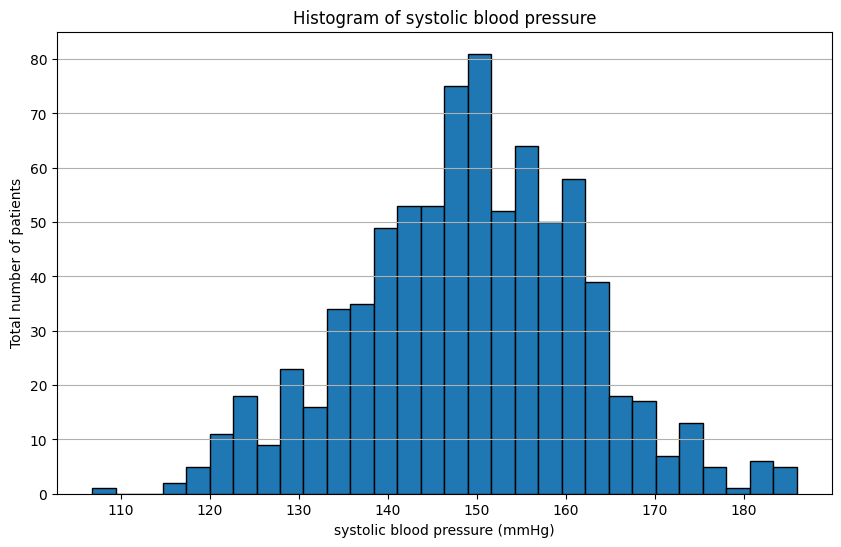

In [3]:
from src.viz import plot_bp_histogram

plot_bp_histogram(df)

In [4]:
total_patients = len(df)

high_bp_count = df[df['systolic_bp'] > 140].shape[0]

percentage_high_bp = (high_bp_count / total_patients) * 100

print(f"Total number of patients: {total_patients}")
print(f"Number of patients with high blood pressure (> 140): {high_bp_count}")
print(f"Proportion of patients with high blood pressure: {percentage_high_bp:.2f}%")

Total number of patients: 800
Number of patients with high blood pressure (> 140): 615
Proportion of patients with high blood pressure: 76.88%


**Observation:**

The histogram shows an approximately normal distribution, but it is centered around 150 mmHg, which is relatively high.

To quantify this, I calculate the proportion of patients exceeding the threshold for high blood pressure (hypertension), which is typically defined as a systolic pressure > 140 mmHg.

### Figure 2 – Boxplot of Weight by Gender

<Figure size 800x600 with 0 Axes>

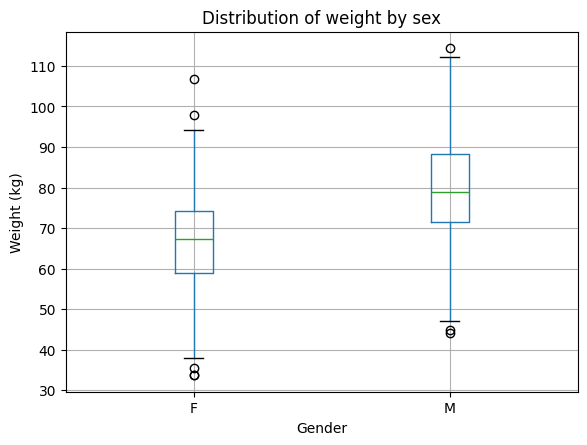

In [5]:
from src.viz import plot_weight_boxplot

plot_weight_boxplot(df)

**Observation:**

Median: As expected, the median weight (the green line in the middle of the box) is higher for men (M) than for women (F).

Variation: Both groups show a relatively symmetric distribution (the boxes are evenly spread above and below the median).

Outliers: The small circles outside the "whiskers" represent individuals with extreme values. I observe that there are people with both very low and very high weights in both groups who deviate from the majority.

### Figure 3 – Bar Chart of the Proportion of Smokers

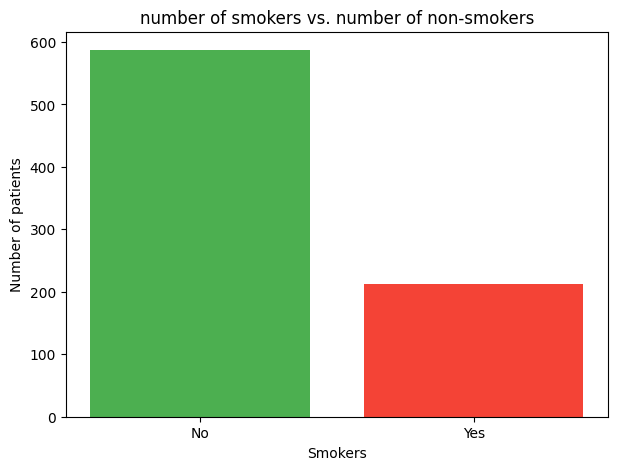

In [6]:
from src.viz import plot_smoker_bar_chart

plot_smoker_bar_chart(df)

**Observation:**

Distribution: The chart clearly shows that smokers make up a minority. The ratio is approximately 3:1 (about 75% non-smokers vs. 25% smokers).

The imbalance in group sizes (class imbalance) is important to note for our later hypothesis testing. Since the Smokers Group is considerably smaller, it may affect the reliability of our statistical tests, but the sample is likely still large enough to draw meaningful conclusions.

# 2. Simulations


In this simulations, I first calculate the actual proportion of sick individuals in the dataset. I then use this proportion as the probability to simulate a group of 1000 people.

The actual proportion of sick individuals in the dataset is 5.88%, while my simulation of 1,000 people resulted in 5.60%. The difference is very small, confirming that the random simulation accurately reflects the underlying probability

In [7]:
from src.analysis import run_disease_simulation

real_prob, sim_prob = run_disease_simulation(df)


print(f"Actual disease percentage in the dataset: {real_prob * 100:.2f}%")
print(f"Simulated percentage in 1000 individuals: {sim_prob * 100:.2f}%")

Actual disease percentage in the dataset: 5.88%
Simulated percentage in 1000 individuals: 5.60%


# 3. Confidence Intervals and Hypothesis Testing

## Confidence Interval for the Mean of Systolic Blood Pressure

In [8]:
from src.analysis import calculate_confidence_interval

lower_ci, upper_ci = calculate_confidence_interval(df)

print(f"The 95% confidence interval for the mean of systolic blood pressure is: [{lower_ci:.2f}, {upper_ci:.2f}]")

The 95% confidence interval for the mean of systolic blood pressure is: [148.29, 150.07]


Based on the data, I calculated the 95% confidence interval for the mean systolic blood pressure. The interval is [148.29, 150.07].

Conclusion: Based on my sample of 800 patients, I am 95% confident that the true average systolic blood pressure for the entire population (from which this sample was drawn) lies between 148.29 mmHg and 150.07 mmHg.

## Hypothesis Testing

The hypothesis "Smokers have higher mean blood pressure than non-smokers" was tested. To evaluate this, I performed a two-sample t-test.

In [9]:
from src.analysis import test_smoker_blood_pressure

t_stat, p_value = test_smoker_blood_pressure(df)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: 0.4503
P-value: 0.6527


**Conclusion:**

The test resulted in a p-value of 0.6527. This means that if there were truly no difference, there would still be a 65% chance of obtaining data like this (or more extreme) purely by random chance.

Since 0.6527 is much higher than our threshold of 0.05, I cannot reject the null hypothesis. Thus, our analysis shows no statistical evidence that smokers have higher blood pressure in this dataset.

## 4. Linear Algebra (Prediction Model)

I used scikit-learn to create a Linear Regression Model.

I wanted to calculate a mathematical formula that predicts a person's blood pressure based on their Age and Weight.

The model looks at all 800 patients and calculates two things:
1.  Intercept: The mathematical "baseline" blood pressure.
2.  Coefficients: How much blood pressure increases for every 1 year of age and every 1 kg of weight.

In [10]:
coefs, intercept = analyzer.predict_blood_pressure()


print(f"Intercept: {intercept:.2f}")
print(f"Age Coefficient: {coefs[0]:.2f}")
print(f"Weight Coefficient: {coefs[1]:.2f}")

Intercept: 109.50
Age Coefficient: 0.54
Weight Coefficient: 0.18


## 5. Extended Visualization: Age vs. Blood Pressure

To visualize the pattern found by our regression model, I plotted Age against Systolic Blood Pressure.


Blue Dots (Reality): Each dot is a real patient. The data is spread out because individual health varies.

Red Line (The Trend): This line represents the mathematical rule our model calculated. It shows the general trend: as patients get older, their blood pressure consistently rises.

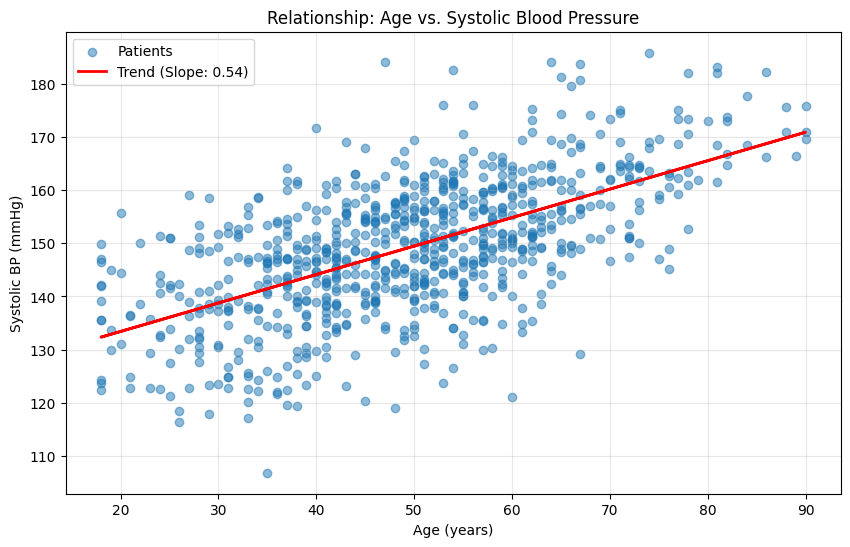

In [11]:
from src.viz import plot_age_vs_bp

# Run the visualization
plot_age_vs_bp(df)